# Waltmart Sales Forecast
https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path = "/content/drive/MyDrive/proyecto series de tiempo/data/"

In [3]:
train = pd.read_csv(path + 'train.csv', parse_dates=['Date'])
test_series = pd.read_csv(path + 'test.csv', parse_dates=['Date'])
stores = pd.read_csv(path + 'stores.csv')
features = pd.read_csv(path + 'features.csv', parse_dates=['Date'])

In [4]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
data = train.merge(features, on=['Store', 'Date']).merge(stores, on='Store')

In [11]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['IsHoliday'] = data['IsHoliday_x']
data = data.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1)

In [12]:
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,False
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,False
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,False
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,False
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,False


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  Type          421570 non-null  object        
 14  Size          421570 non-null  int64         
 15  Month         421

In [14]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000,2012.000000


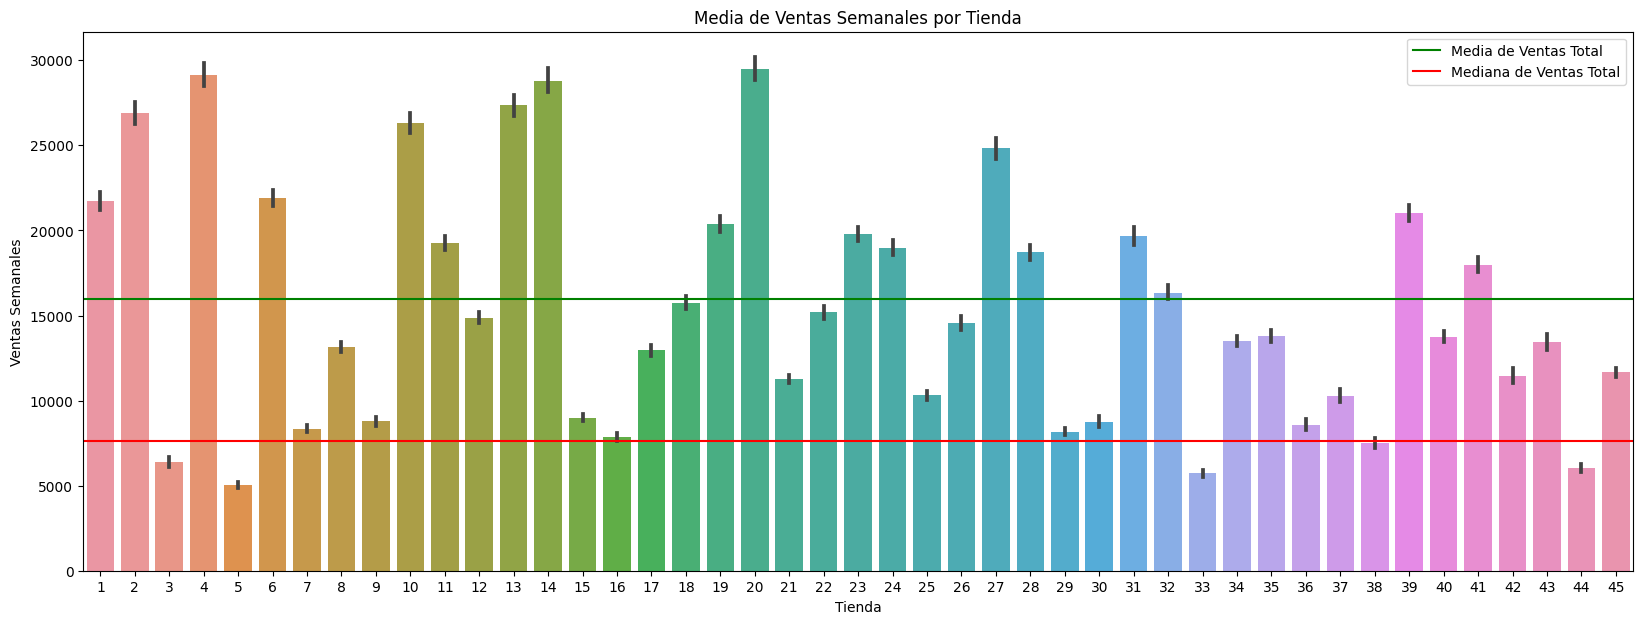

In [15]:
plt.figure(figsize=(20,7))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.axhline(y=data['Weekly_Sales'].mean(), label="Media de Ventas Total", color='green')
plt.axhline(y=data['Weekly_Sales'].median(), label="Mediana de Ventas Total", color='red')
plt.title("Media de Ventas Semanales por Tienda")
plt.ylabel("Ventas Semanales")
plt.xlabel("Tienda")
plt.legend()
plt.show()

In [16]:
data.groupby(['Store','Type'],as_index=False)['Weekly_Sales'].mean().sort_values(by='Weekly_Sales', ascending=False).head()

,Store,Type,Weekly_Sales
19,20,A,29508.301592
3,4,A,29161.210415
13,14,A,28784.851727
12,13,A,27355.136891
1,2,A,26898.070031


Las tiendas 20, 4, 14, 13 y 2 son las que reportan mayores ventas, siendo las cinco tiendas de tipo A.

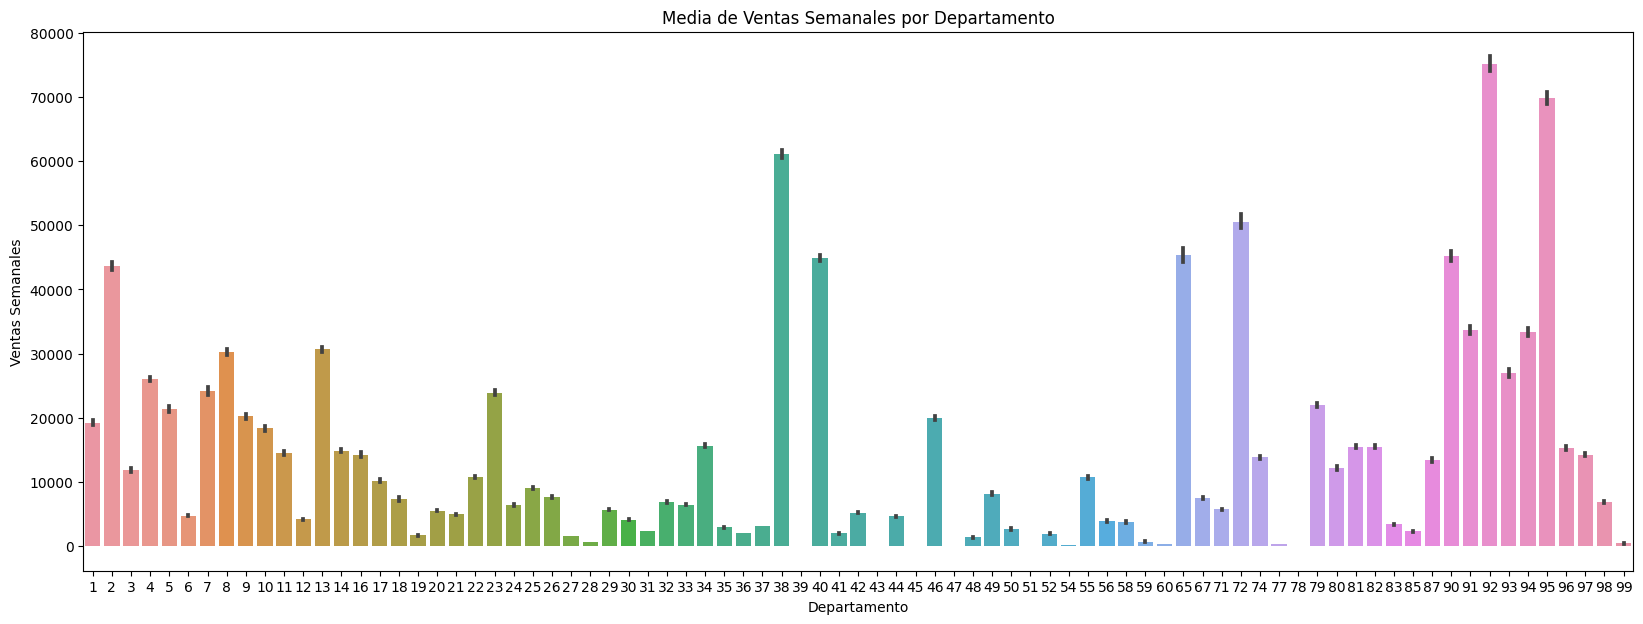

In [17]:
plt.figure(figsize=(20,7))
sns.barplot(x='Dept', y='Weekly_Sales', data=data)
# plt.axhline(y=data['Weekly_Sales'].mean(), label="Media de Ventas Total", color='green')
plt.title("Media de Ventas Semanales por Departamento")
plt.ylabel("Ventas Semanales")
plt.xlabel("Departamento")
plt.show()

In [18]:
data.groupby(['Dept', 'Type'], as_index=False)['Weekly_Sales'].mean().sort_values(by='Weekly_Sales', ascending=False).head()

,Dept,Type,Weekly_Sales
203,92,A,112156.881662
212,95,A,97094.026043
197,90,A,70550.502168
105,38,A,65005.018090
166,72,A,62046.661710


También se observa que los departamentos 92, 95, 90, 38 y 72 son los departamentos que realizan mayores ventas

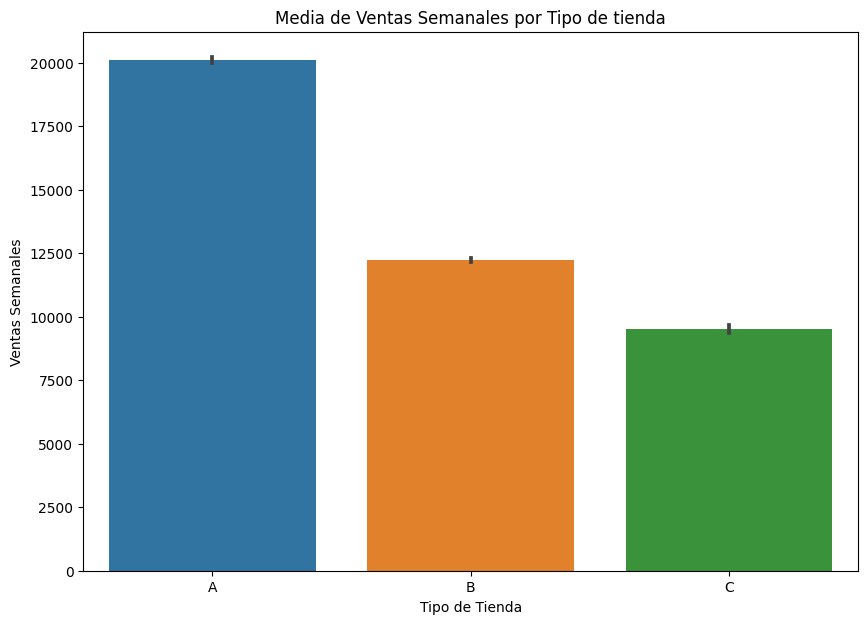

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x='Type', y='Weekly_Sales', data=data)
plt.title("Media de Ventas Semanales por Tipo de tienda")
plt.ylabel("Ventas Semanales")
plt.xlabel("Tipo de Tienda")
plt.show()

Las tiendas tipo A son las que reportan la mayor cantidad de ganancias en promedio

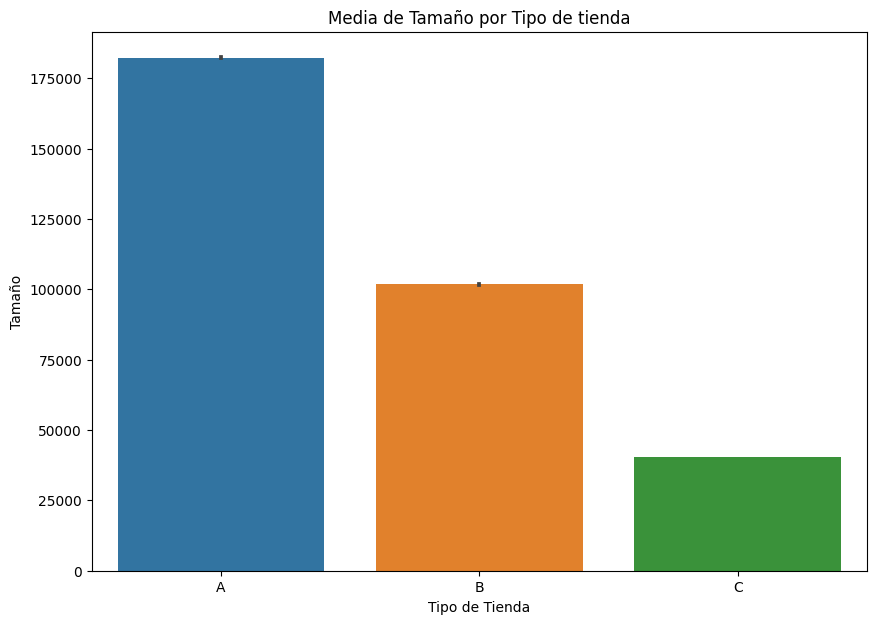

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x='Type', y='Size', data=data)
plt.title("Media de Tamaño por Tipo de tienda")
plt.ylabel("Tamaño")
plt.xlabel("Tipo de Tienda")
plt.show()

Tambien son las más grandes

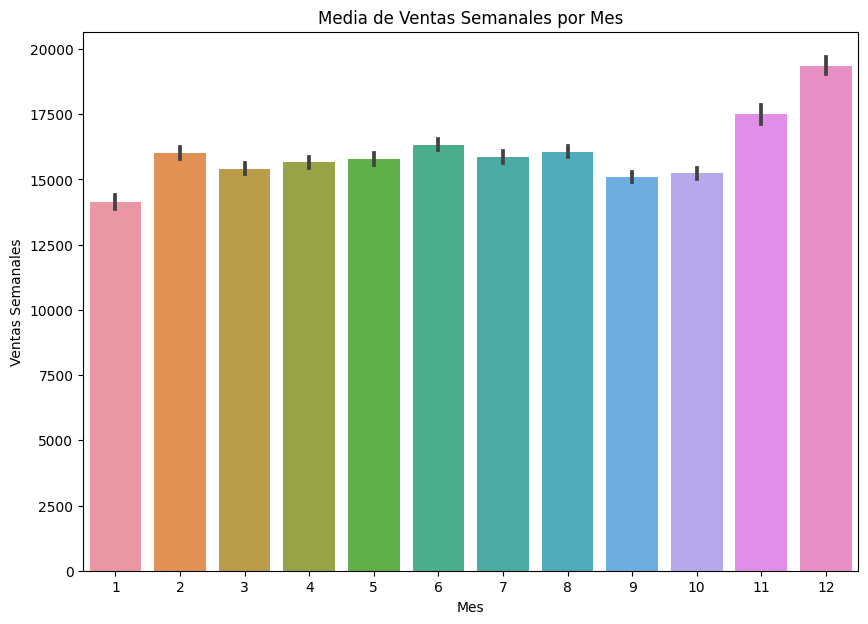

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x='Month', y='Weekly_Sales', data=data)
plt.title("Media de Ventas Semanales por Mes")
plt.ylabel("Ventas Semanales")
plt.xlabel("Mes")
plt.show()

In [22]:
data.groupby('Month', as_index=False)['Weekly_Sales'].mean().sort_values(by='Weekly_Sales', ascending=False).head()

,Month,Weekly_Sales
11,12,19355.702141
10,11,17491.031424
5,6,16326.137002
7,8,16062.516933
1,2,16008.779217


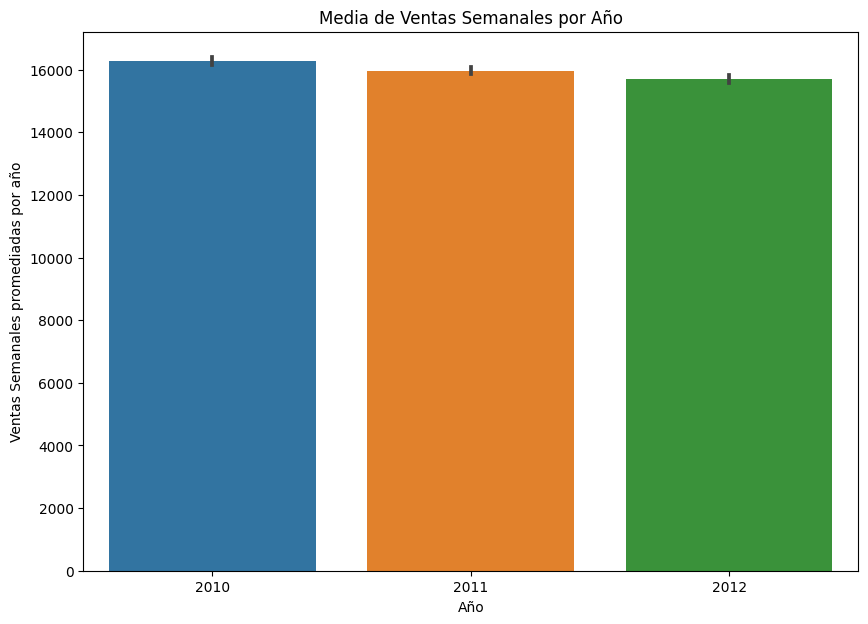

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x='Year', y='Weekly_Sales', data=data)
plt.title("Media de Ventas Semanales por Año")
plt.ylabel("Ventas Semanales promediadas por año")
plt.xlabel("Año")
plt.show()

El 2010 vendió ligeramente más que los otros años

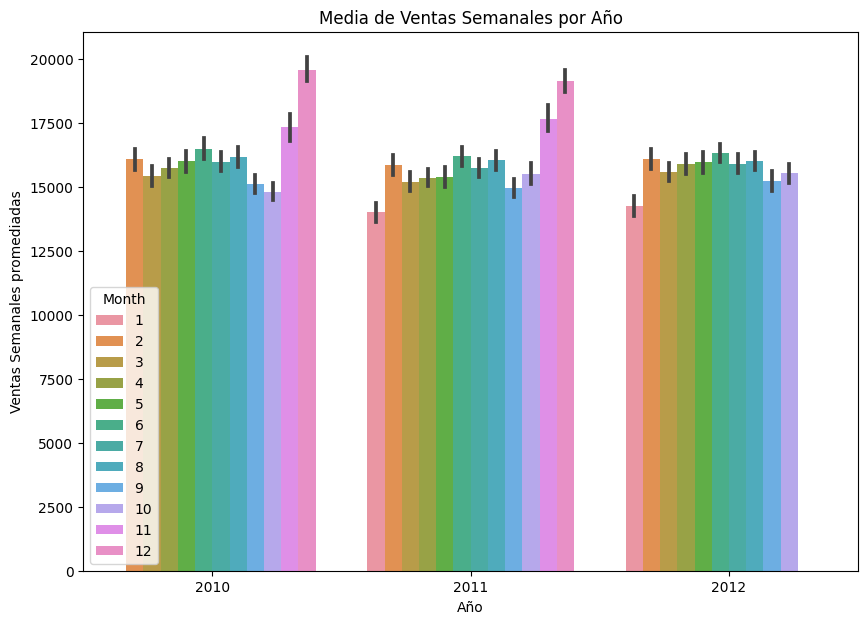

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x='Year', y='Weekly_Sales', data=data, hue='Month')
plt.title("Media de Ventas Semanales por Año")
plt.ylabel("Ventas Semanales promediadas")
plt.xlabel("Año")
plt.show()

Los meses 12, 11, 6, 8 y 2 reportan la mayor cantidad de ventas a lo largo del año

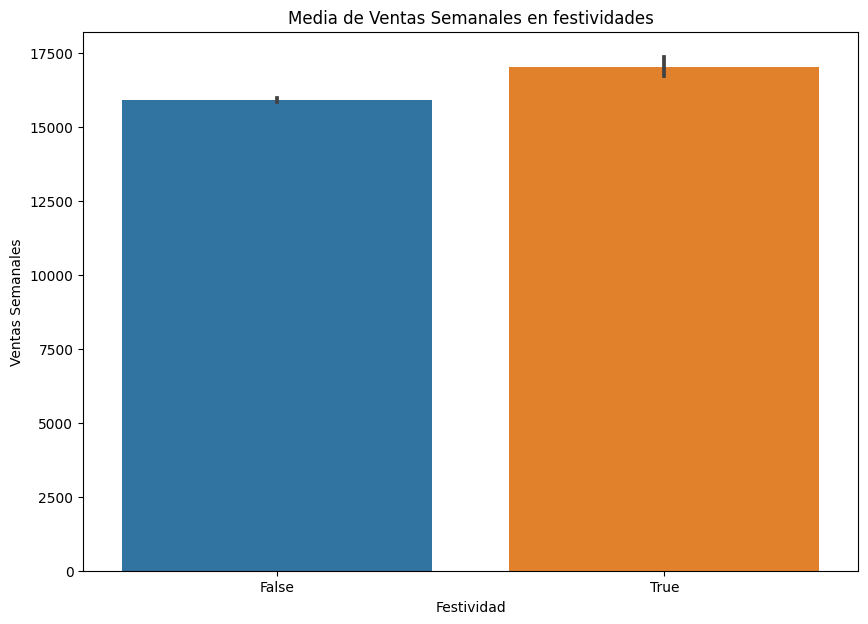

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data)
plt.title("Media de Ventas Semanales en festividades")
plt.ylabel("Ventas Semanales")
plt.xlabel("Festividad")
plt.show()

En promedio cuando se está en alguna festividad y existen rebajas se reportan más ventas

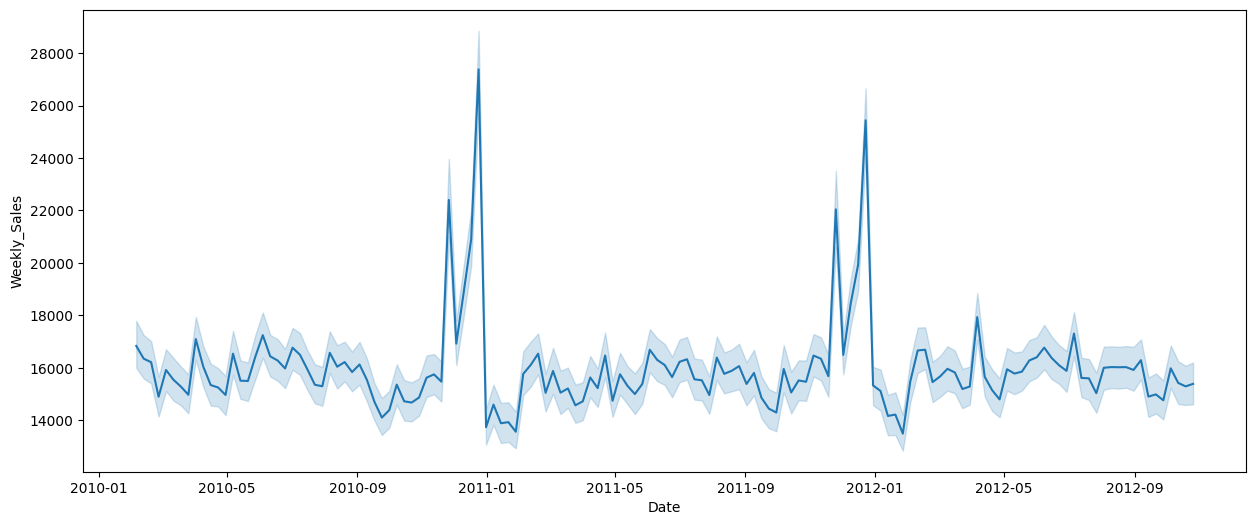

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.show()

Se puede ver claramente que los picos de ventas se dan al final de cada año lo que se da por una clara estacionalidad en los datos ocasionado por las festividades que se dan en el país (USA) de donde provienen los datos.

In [27]:
data[data['IsHoliday']]['Date'].nunique()

10

Tenemos 10 fechas festivas

In [28]:
data[data['IsHoliday']]['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

Fechas festivas de rebajas:

febrero: superbowl

septiembre: ??

noviembre: día de gracias (black friday)

diciembre: navidad

In [29]:
map_festivos = {pd.Timestamp('2010-02-12'):'febrero', pd.Timestamp('2011-02-11'):'febrero',pd.Timestamp('2012-02-10'):'febrero',
           pd.Timestamp('2010-09-10'):'septiembre', pd.Timestamp('2011-09-09'):'septiembre',pd.Timestamp('2012-09-07'):'septiembre',
           pd.Timestamp('2010-11-26'):'noviembre', pd.Timestamp('2011-11-25'):'noviembre',
           pd.Timestamp('2010-12-31'):'diciembre', pd.Timestamp('2011-12-30'):'diciembre'}

In [30]:
serie_festivos = data['Date'].map(map_festivos)
serie_festivos =serie_festivos.fillna('no_festivo')
data['Holiday_Month'] = serie_festivos

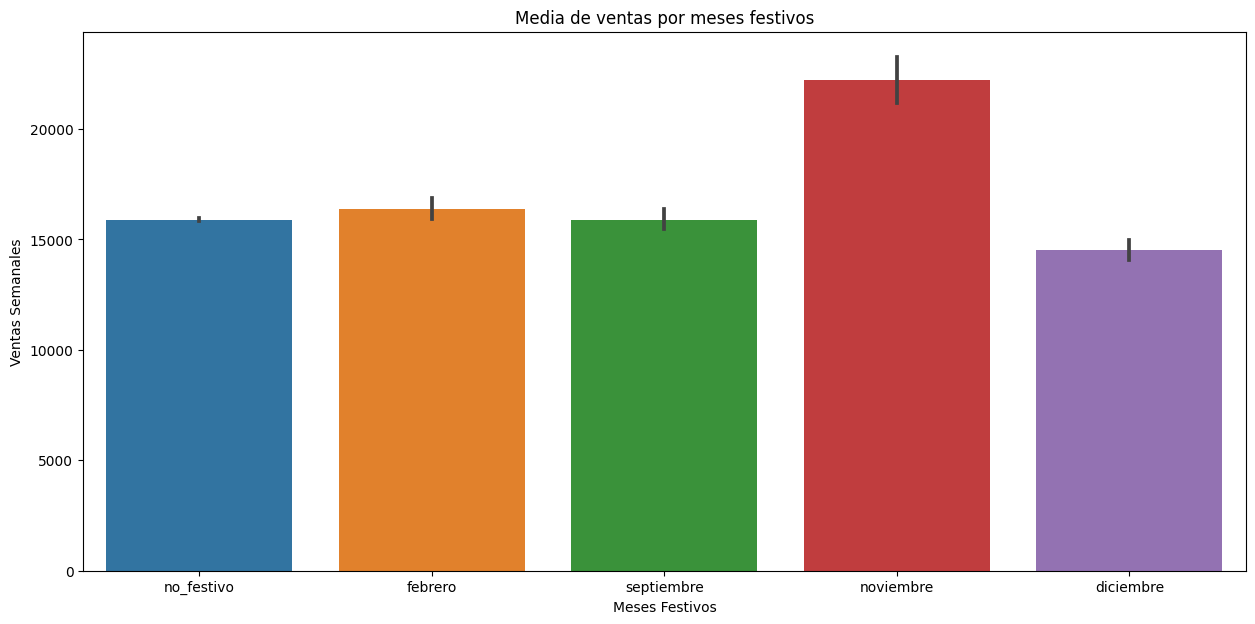

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(x='Holiday_Month', y='Weekly_Sales', data=data)
plt.xlabel("Meses Festivos")
plt.ylabel("Ventas Semanales")
plt.title("Media de ventas por meses festivos")
plt.show()

Se observa como en las fechas festivas de septiembre las ventas no tienen gran variación en comparación a las ventas de fechas normales, en las fechas festivas de febrero (superbowl) se observa un ligero incremento en las ventas,
para las ventas de diciembre se observa que éstas son incluso menores que en fechas normales; mientras que para las fechas de festividades de noviembre si se observa un incremento notable, los más probable es que se deba al black friday y a las compras tempranas de fin de año

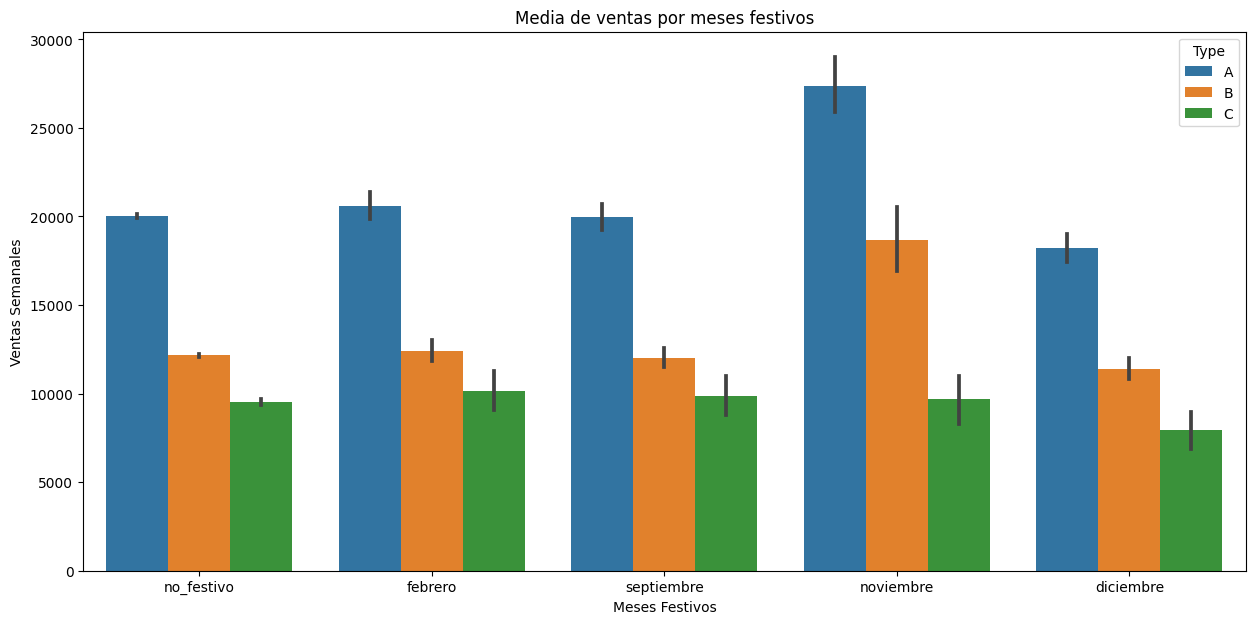

In [32]:
plt.figure(figsize=(15,7))
sns.barplot(x='Holiday_Month', y='Weekly_Sales', data=data, hue='Type')
plt.xlabel("Meses Festivos")
plt.ylabel("Ventas Semanales")
plt.title("Media de ventas por meses festivos")
plt.show()

Se puede observar que se sigue manteniendo la misma tendencia. Las ventas obtenidades en el mes de noviembre son las que generan más ventas dependiendo el tipo (tamaño) de tienda.

<Axes: ylabel='Weekly_Sales'>

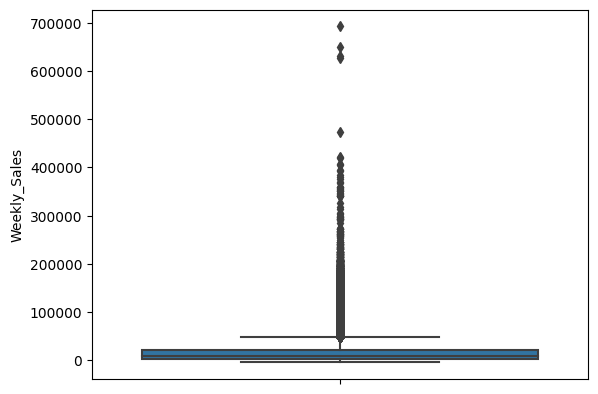

In [33]:
sns.boxplot(y='Weekly_Sales', data=data)

En este boxplot podemos observar la distribución de las ventas semanales, con este se puede observar una distribución sesgada (right-skewed)

In [34]:
max_value = data['Weekly_Sales'].quantile(0.75) + (data['Weekly_Sales'].quantile(0.75) - data['Weekly_Sales'].quantile(0.25)) * 1.5

In [35]:
max_value

47395.15625

In [36]:
data['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

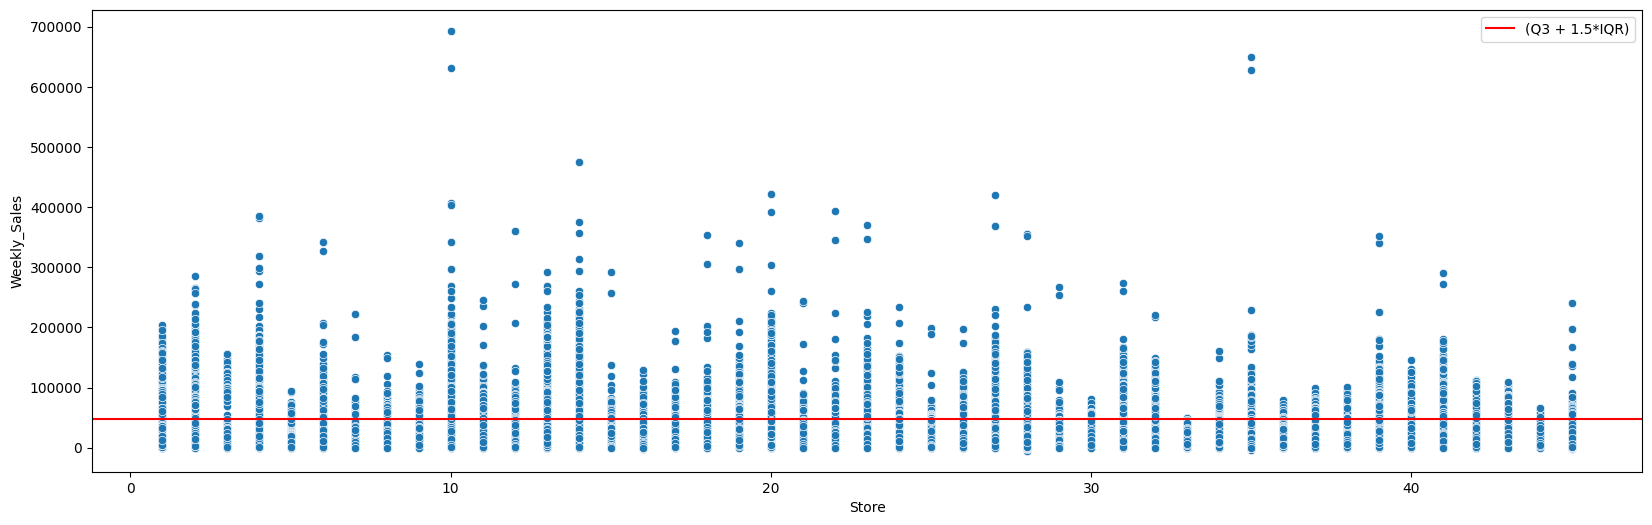

In [37]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Store',y='Weekly_Sales',data=data)
plt.axhline(y=max_value,color='red',label='(Q3 + 1.5*IQR)')
plt.legend()
plt.show()

<Figure size 2000x600 with 0 Axes>

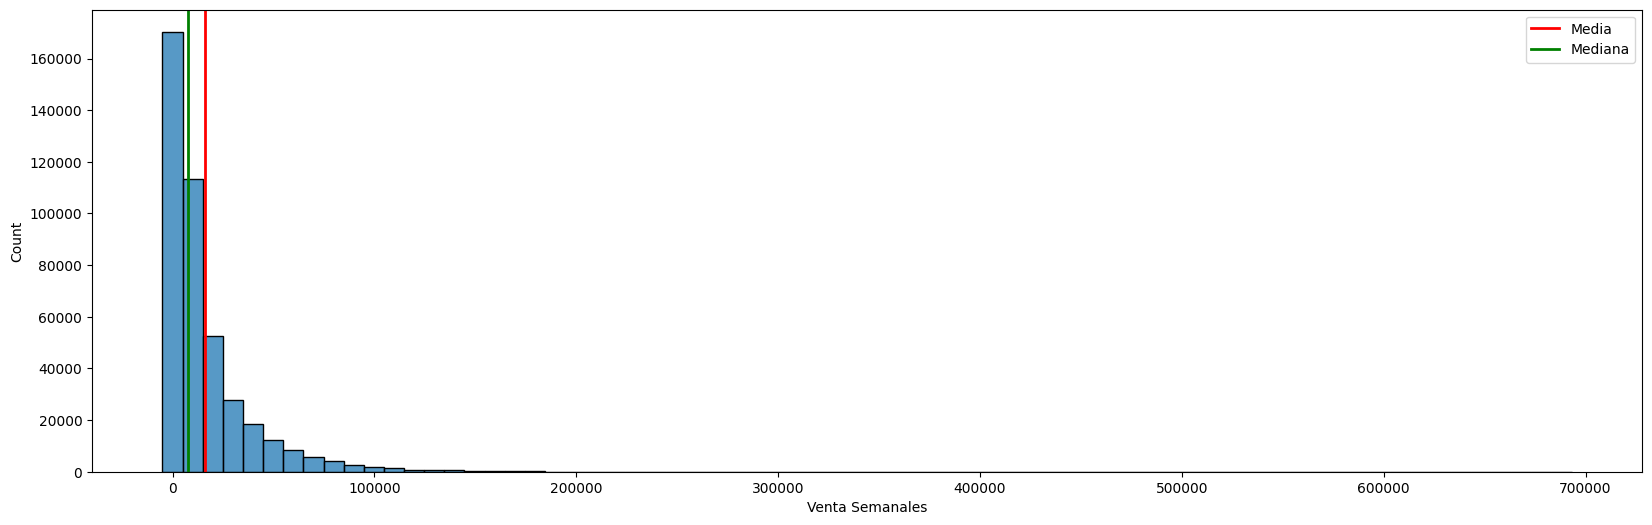

In [38]:
plt.figure(figsize=(20, 6))
fig, ax = plt.subplots(figsize=(20, 6))

sns.histplot(x=data['Weekly_Sales'], bins=70, ax=ax)
ax.axvline(x=data['Weekly_Sales'].mean(), color='red', label='Media', linewidth=2)
ax.axvline(x=data['Weekly_Sales'].median(), color='green', label='Mediana', linewidth=2)
ax.set_xlabel("Venta Semanales")
ax.legend()
plt.show()

Se puede observar que la distribución de ventas semanales está sesgada (right skewed)

In [39]:
data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

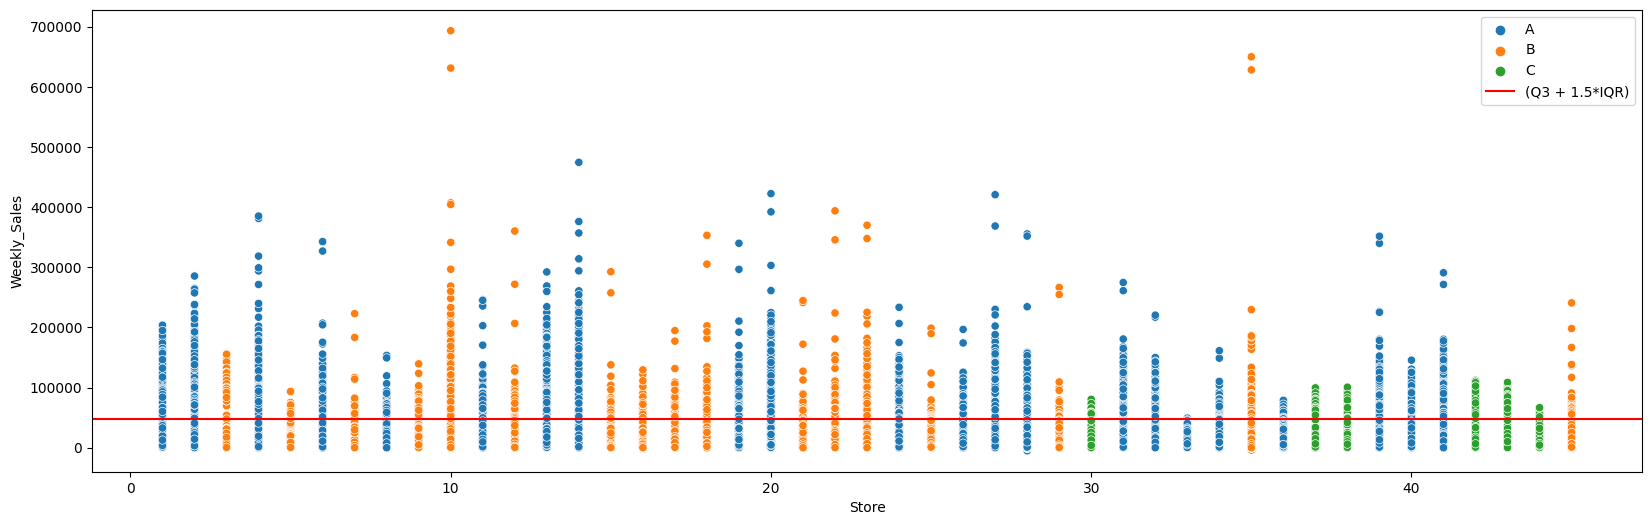

In [40]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Store',y='Weekly_Sales',data=data,hue='Type')
plt.axhline(y=max_value,color='red',label='(Q3 + 1.5*IQR)')
plt.legend()
plt.show()

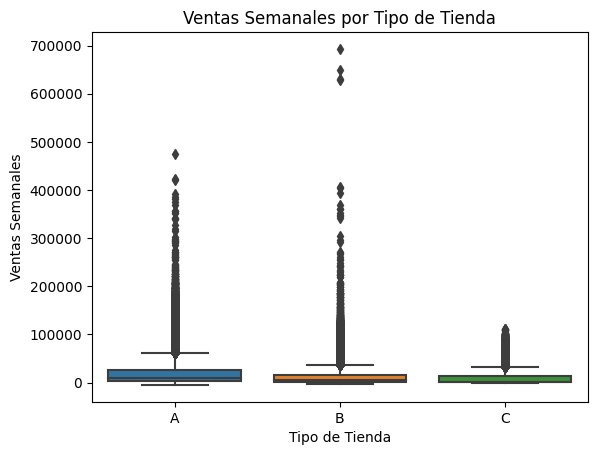

In [41]:
sns.boxplot(x='Type', y='Weekly_Sales',data=data)
plt.title("Ventas Semanales por Tipo de Tienda")
plt.xlabel('Tipo de Tienda')
plt.ylabel('Ventas Semanales')
plt.show()

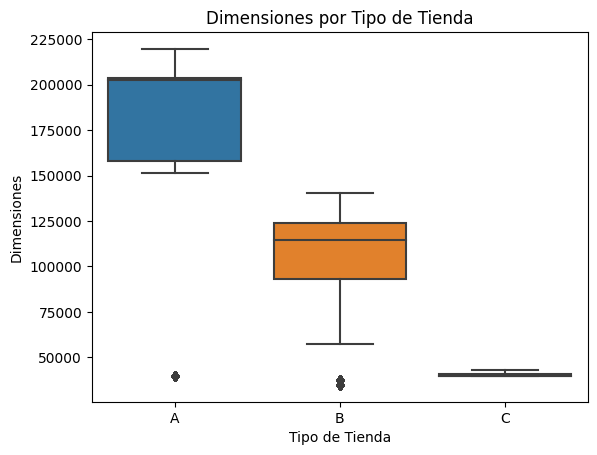

In [42]:
sns.boxplot(x='Type', y='Size',data=data)
plt.title("Dimensiones por Tipo de Tienda")
plt.xlabel('Tipo de Tienda')
plt.ylabel('Dimensiones')
plt.show()

En las tres tipos de tiendas se pueden observar un número considerable de outliers, esto se entiende como consecuencia de que la serie de tiempo cuenta con una estacionalidad.

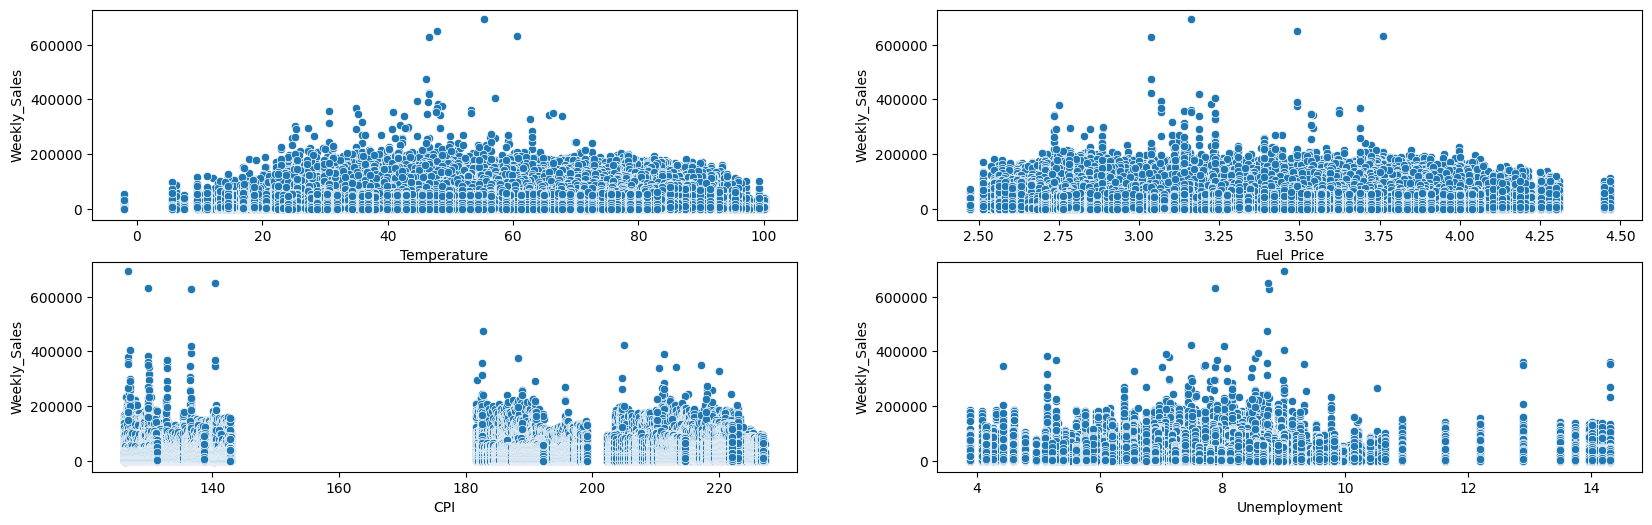

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales',data=data,ax=ax[0,0])
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales',data=data,ax=ax[0,1])
sns.scatterplot(x='CPI', y='Weekly_Sales',data=data,ax=ax[1,0])
sns.scatterplot(x='Unemployment', y='Weekly_Sales',data=data,ax=ax[1,1])
plt.show()

In [44]:
print(np.corrcoef(data['Temperature'], data['Weekly_Sales'])[0,1])
print(np.corrcoef(data['Fuel_Price'], data['Weekly_Sales'])[0,1])
print(np.corrcoef(data['CPI'], data['Weekly_Sales'])[0,1])

-0.002312447010259368
-0.00012029554499576824
-0.02092133531881917


In [45]:
data['MarkDown1'] = data['MarkDown1'].fillna(0)
data['MarkDown2'] = data['MarkDown2'].fillna(0)
data['MarkDown3'] = data['MarkDown3'].fillna(0)
data['MarkDown4'] = data['MarkDown4'].fillna(0)
data['MarkDown5'] = data['MarkDown5'].fillna(0)

<Axes: xlabel='Date', ylabel='MarkDown5'>

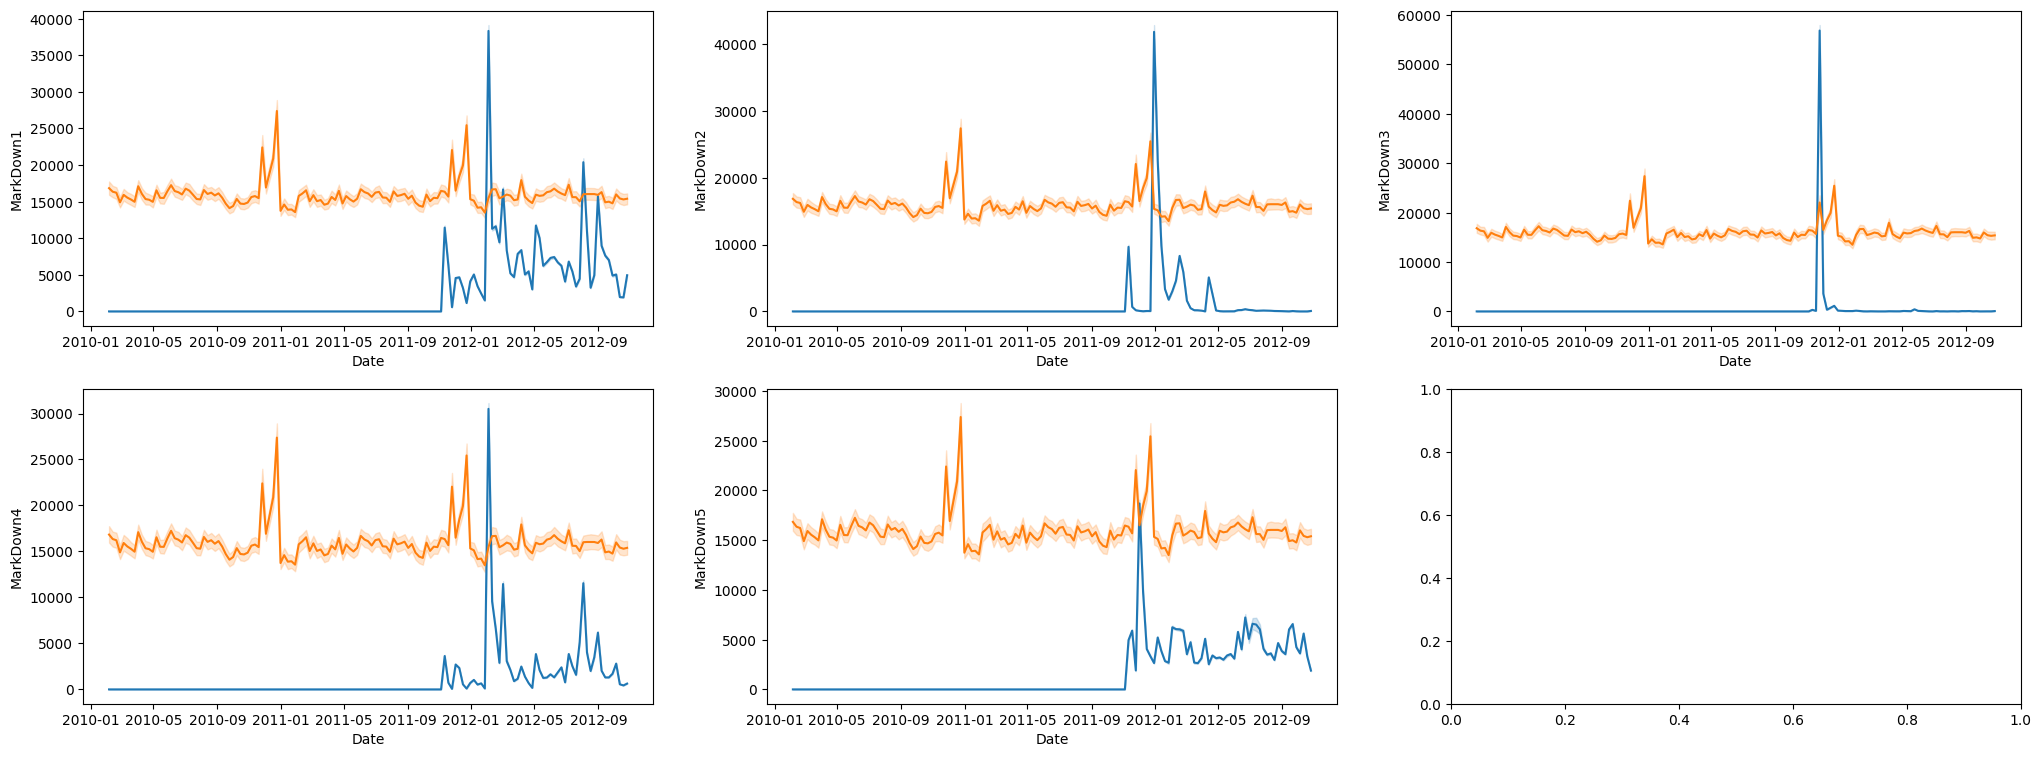

In [46]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(25,9))
sns.lineplot(x='Date', y='MarkDown1', data=data, ax=ax[0,0])
sns.lineplot(x='Date', y='Weekly_Sales', data=data, ax=ax[0,0])
sns.lineplot(x='Date', y='MarkDown2', data=data, ax=ax[0,1])
sns.lineplot(x='Date', y='Weekly_Sales', data=data, ax=ax[0,1])
sns.lineplot(x='Date', y='MarkDown3', data=data, ax=ax[0,2])
sns.lineplot(x='Date', y='Weekly_Sales', data=data, ax=ax[0,2])
sns.lineplot(x='Date', y='MarkDown4', data=data, ax=ax[1,0])
sns.lineplot(x='Date', y='Weekly_Sales', data=data, ax=ax[1,0])
sns.lineplot(x='Date', y='MarkDown5', data=data, ax=ax[1,1])
sns.lineplot(x='Date', y='Weekly_Sales', data=data, ax=ax[1,1])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          421570 non-null  int64         
 1   Dept           421570 non-null  int64         
 2   Date           421570 non-null  datetime64[ns]
 3   Weekly_Sales   421570 non-null  float64       
 4   Temperature    421570 non-null  float64       
 5   Fuel_Price     421570 non-null  float64       
 6   MarkDown1      421570 non-null  float64       
 7   MarkDown2      421570 non-null  float64       
 8   MarkDown3      421570 non-null  float64       
 9   MarkDown4      421570 non-null  float64       
 10  MarkDown5      421570 non-null  float64       
 11  CPI            421570 non-null  float64       
 12  Unemployment   421570 non-null  float64       
 13  Type           421570 non-null  object        
 14  Size           421570 non-null  int64         
 15  

In [48]:
data.isna().sum()

Store            0
Dept             0
Date             0
Weekly_Sales     0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Type             0
Size             0
Month            0
Year             0
IsHoliday        0
Holiday_Month    0
dtype: int64

In [49]:
data = data.fillna(0)

In [50]:
data.isna().sum()

Store            0
Dept             0
Date             0
Weekly_Sales     0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Type             0
Size             0
Month            0
Year             0
IsHoliday        0
Holiday_Month    0
dtype: int64

In [51]:
print("Correlación")
print("MarkDown1-MarkDown2",np.corrcoef(data['MarkDown1'],data['MarkDown2'])[0,1])
print("MarkDown1-MarkDown3",np.corrcoef(data['MarkDown1'],data['MarkDown3'])[0,1])
print("MarkDown1-MarkDown4",np.corrcoef(data['MarkDown1'],data['MarkDown4'])[0,1])
print("MarkDown1-MarkDown5",np.corrcoef(data['MarkDown1'],data['MarkDown5'])[0,1])
print("MarkDown2-MarkDown3",np.corrcoef(data['MarkDown2'],data['MarkDown3'])[0,1])
print("MarkDown2-MarkDown4",np.corrcoef(data['MarkDown2'],data['MarkDown4'])[0,1])
print("MarkDown2-MarkDown5",np.corrcoef(data['MarkDown2'],data['MarkDown5'])[0,1])
print("MarkDown3-MarkDown4",np.corrcoef(data['MarkDown3'],data['MarkDown4'])[0,1])
print("MarkDown3-MarkDown5",np.corrcoef(data['MarkDown3'],data['MarkDown5'])[0,1])
print("MarkDown4-MarkDown5",np.corrcoef(data['MarkDown4'],data['MarkDown5'])[0,1])


Correlación
MarkDown1-MarkDown2 0.1748676838742759
MarkDown1-MarkDown3 -0.014410939508900598
MarkDown1-MarkDown4 0.8389044151764629
MarkDown1-MarkDown5 0.41505018344645284
MarkDown2-MarkDown3 -0.0060802320828915015
MarkDown2-MarkDown4 0.11324998820397558
MarkDown2-MarkDown5 0.1317350863214092
MarkDown3-MarkDown4 -0.012020092639337203
MarkDown3-MarkDown5 0.04247115971348799
MarkDown4-MarkDown5 0.3033695752830117


La relación entre MarkDown1 y MarkDown4 es muy elevada en comparación al resto

In [52]:
print("Temperature-Fuel_Price",np.corrcoef(data['Temperature'],data['Fuel_Price'])[0,1])
print("Temperature-CPI",np.corrcoef(data['Temperature'],data['CPI'])[0,1])
print("Temperature-Unemployment",np.corrcoef(data['Temperature'],data['Unemployment'])[0,1])
print("Fuel_Price-CPI",np.corrcoef(data['Fuel_Price'],data['CPI'])[0,1])
print("Fuel_Price-Unemployment",np.corrcoef(data['Fuel_Price'],data['Unemployment'])[0,1])
print("CPI-Unemployment",np.corrcoef(data['Fuel_Price'],data['Unemployment'])[0,1])

Temperature-Fuel_Price 0.143858819124473
Temperature-CPI 0.1821116074458967
Temperature-Unemployment 0.09673018030334898
Fuel_Price-CPI -0.16421040615398225
Fuel_Price-Unemployment -0.033852702609069564
CPI-Unemployment -0.033852702609069564


In [53]:
print("MarkDown1-Temperature",np.corrcoef(data['MarkDown1'],data['Temperature'])[0,1])
print("MarkDown2-Temperature",np.corrcoef(data['MarkDown2'],data['Temperature'])[0,1])
print("MarkDown3-Temperature",np.corrcoef(data['MarkDown3'],data['Temperature'])[0,1])
print("MarkDown4-Temperature",np.corrcoef(data['MarkDown4'],data['Temperature'])[0,1])
print("MarkDown5-Temperature",np.corrcoef(data['MarkDown5'],data['Temperature'])[0,1])

MarkDown1-Temperature -0.026415133236133845
MarkDown2-Temperature -0.17967244823506168
MarkDown3-Temperature -0.05602632435940539
MarkDown4-Temperature -0.050280909559952146
MarkDown5-Temperature -0.014752445322529222


In [54]:
print("MarkDown1-Fuel_Price",np.corrcoef(data['MarkDown1'],data['Fuel_Price'])[0,1])
print("MarkDown2-Fuel_Price",np.corrcoef(data['MarkDown2'],data['Fuel_Price'])[0,1])
print("MarkDown3-Fuel_Price",np.corrcoef(data['MarkDown3'],data['Fuel_Price'])[0,1])
print("MarkDown4-Fuel_Price",np.corrcoef(data['MarkDown4'],data['Fuel_Price'])[0,1])
print("MarkDown5-Fuel_Price",np.corrcoef(data['MarkDown5'],data['Fuel_Price'])[0,1])

MarkDown1-Fuel_Price 0.29705626212160746
MarkDown2-Fuel_Price 0.029153236995918447
MarkDown3-Fuel_Price 0.018614901801769026
MarkDown4-Fuel_Price 0.16662194813678477
MarkDown5-Fuel_Price 0.2154197019665837


In [55]:
print("MarkDown1-CPI",np.corrcoef(data['MarkDown1'],data['CPI'])[0,1])
print("MarkDown2-CPI",np.corrcoef(data['MarkDown2'],data['CPI'])[0,1])
print("MarkDown3-CPI",np.corrcoef(data['MarkDown3'],data['CPI'])[0,1])
print("MarkDown4-CPI",np.corrcoef(data['MarkDown4'],data['CPI'])[0,1])
print("MarkDown5-CPI",np.corrcoef(data['MarkDown5'],data['CPI'])[0,1])

MarkDown1-CPI 0.01091475844785883
MarkDown2-CPI -0.003553898865698278
MarkDown3-CPI -0.005838832901967302
MarkDown4-CPI -0.0020471443626220603
MarkDown5-CPI 0.06790590389027243


In [56]:
print("MarkDown1-Unemployment",np.corrcoef(data['MarkDown1'],data['Unemployment'])[0,1])
print("MarkDown2-Unemployment",np.corrcoef(data['MarkDown2'],data['Unemployment'])[0,1])
print("MarkDown3-Unemployment",np.corrcoef(data['MarkDown3'],data['Unemployment'])[0,1])
print("MarkDown4-Unemployment",np.corrcoef(data['MarkDown4'],data['Unemployment'])[0,1])
print("MarkDown5-Unemployment",np.corrcoef(data['MarkDown5'],data['Unemployment'])[0,1])

MarkDown1-Unemployment -0.10516829443074674
MarkDown2-Unemployment -0.04142728104177027
MarkDown3-Unemployment -0.01807763777785006
MarkDown4-Unemployment -0.07651283584314571
MarkDown5-Unemployment -0.1204062783660657


En las características restantes no existe relación relevante